# Motivation 

> All models are wrong, but some are useful. — George E. P. Box

During the winter of 2018, I decided to work through the [SKLearn library](http://scikit-learn.org/) in Python and try to rigorously understand most, if not all, of the algorithms implemented in it. To my surprise, I found that it was rather difficult to find comprehensive explorations of the algorithms which were also accessible to non-experts; most blogs skimmed over the mathematical underpinnings of machine learning, and most papers presupposed great familiarity with the field. 

This section of my blog is devoted to exploring ML in a way that is comprehensive and rigorous, but still practical and accessible to a relatively broad audience. Obviously, not every reader will be interested in every aspect of each post. You might want to simply gain a practical understanding of when to use a certain clustering algorithm; or you might want to learn why expectation-maximization optimization really works. However, I'm hoping that most people will find *something* interesting in these posts. 

I think there are at least two reasons that it's worth deeply understanding ML algorithms:

1. First, it's fun! The math behind statistical inference and machine learning is *really* cool. 
2. More practically, it will allow you to write more effective code. It's much easier to figure out why your model isn't working if you actually understand how your model works. 

# Post Structure

 In order to let readers easily jump around, I will loosely divide each post into the following four sections:

1. Motivation and Intuition
2. Mathematical Derivation
3. Implementation from Scratch (i.e without using machine learning Libraries - this is to make sure we really understand how each algorithms works)
4. Practical Use (i.e. using libraries like SKLearn, Tensorflow, Pytorch)

It's also worth noting that in both the 1st and 4th sections, I will focus extensively on use cases of each of the algorithms - i.e. the kinds of situations in which you'd use a Naives Bayes Classifier over a SVN or vice versa. Admittedly, not every post will follow this exact structure, but each post should generally cover these kinds of information. 

# Blog Structure



# Background

If you're just starting to learn about Data Science, I've listed a couple of pieces of background you might find handy below. This is meant less as a standalone post, and more as a running repository where you can check on bits of terminology which I might have glossed over too quickly.

The math section can't serve as a substitute for a more formal course in Statistics or Analysis, but it (hopefully) contains enough information to help you get an intuitive understanding of how most models work.

## <a name="math"></a>  A Blazing-Fast Review of Probability Theory

### Events and Random Variables

In statistics, we like to think about the *outcomes* of *random experiments.* For example, one random experiment might be that my roommate rolls a pair of dice. There are 12 possible outcomes to this event: he could roll a $2$, $3$, $4$, etc. However, we can also group different outcomes together into *events*: for example, we might denote $A$ as the event that my roommate rolls an odd number.

More mathematically, we might have a set $\Omega$, called the sample space, which contains all the possible outcomes of a random experiment. An outcome $\omega$ is an element of the sample space, i.e. $\omega \in \Omega$, and an event $A$ is a subset of the sample space, i.e. $A \subset \Omega$. In the previous example, 

$$ \Omega = \{ \text{ roll a $2$, roll a $3$, roll a $3$, \dots, roll a $12$ } \} $$
$$ \omega = \text{ roll a $1$ } \}$$
$$ A = \{ \text{ roll an odd number } \} $$

It's important to note that although each outcome is *associated* with a number, each outcome is *not* a number: it's a different kind of objects. However, we might decide want want to *represent* each outcome with a number, and this is where random variables come in.

A *random variable* is a function from the sample space to the real number line. Before a random event occurs, the random variable is like a black box: we can't know precisely what its value will be. After an experiment however, the random variable crystallizes to some real number associated with an outcome of the experiment. More formally, $X$ is a random variable if 
$$X : \Omega \to \mathbb{R}$$
If we wanted to, we can also define random vectors as maps from the sample space to lists of real numbers, i.e. 
$$ (X_1, \dots, X_n) = \vec{X} : \Omega \to \mathbb{R}^k$$

For example, let $X$ be the number that the sum of the values that my roommate rolls on a pair of dice (we tend to represent random variables with *capital letters*, and deterministic/nonrandom variables with lowercase letters). Then, if Alex rolls a $3$ and a $4$, $X$ would crystallize to a value of $7$; and if Alex rolls an $6$ and a $2$, $X$ would crystallize to a value of $2$, et cetera. In this way, random variables are random because their value depends on the outcome of the random experiment.

Random variables have *distributions* which describe how likely they are to take on certain values after the experiment has concluded. For example, our random variabel $X$ from the last paragraph will never take on an odd value - this is a fact about its distribution. We can simulate the dice rolls and look at the distribution below:

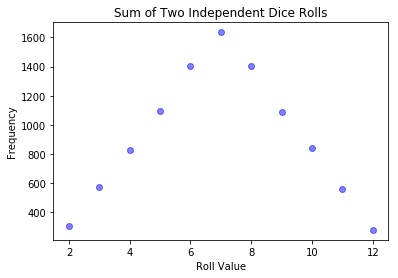

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate 10000 rolls
dice1 = np.random.randint(1, 7, size = 10000)
dice2 = np.random.randint(1, 7, size = 10000)
roll = dice1 + dice2

# Plot
roll_counts = np.unique(roll, return_counts = True)
plt.scatter(roll_counts[0], roll_counts[1], color = 'blue', alpha = 0.5)
plt.title('Sum of Two Independent Dice Rolls')
plt.xlabel('Roll Value')
plt.ylabel('Frequency')
plt.show()


Although it's nice to visualize distributions, we also want to be able to write them down mathematically. We typically do this in one of three ways ways (although these are not the only three ways to specify a distribution).

### 1. Culmulative Distribution Functions

First, we can try to work with the *Culmulative Distribution Function* (CDF). The CDF of a random variable is a function $F$ which takes in a real number $y$ and returns the probability that the random variable is less than or equal to $y$. 
$$F(y) = P(X \le y)$$

For example, we can plot an empirical CDF of the data above.

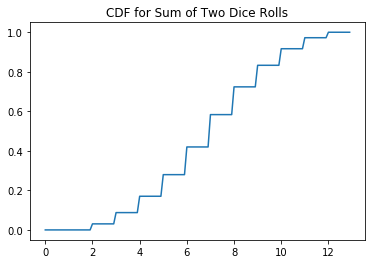

In [90]:
# Create CDF
def my_cdf(y):
    result = sum(roll <= y)/10000
    return result
my_cdf = np.vectorize(my_cdf)

# Plot
x_values = np.arange(0, 130, 1).astype(np.float32)/10
output = my_cdf(x_values)
plt.plot(x_values, output)
plt.title('CDF for Sum of Two Dice Rolls')
plt.show()

CDFs are useful because we can use them to calculate the probability that a random variable will lie in any arbitrary interval. In particular,

$$P(a < X < b) = P(X \le b) - P(X \le a) = F(b) - F(a)$$

### 2. Probability Mass Functions

Some distributions are *discrete*, in that they can only take on quantized or "spaced out" values. For example, our example random variable $X$ was discrete because it could only crystallize to become an whole number, but it could never crystallize to a fraction. We often use something called the Probability Mass Function, or PMF to describe the distribution of discrete random variables. If we denote the PMF as $P_X$, then for any real number $y$, 
$$P_X(y) = P(X = y)$$

We'll plot an empirical PMF of the data above.

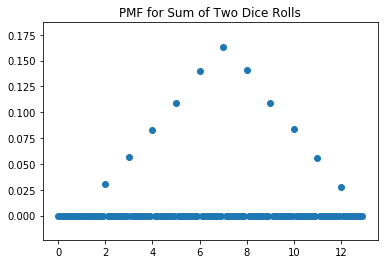

In [92]:
# Create CDF
def my_pmf(y):
    result = sum(roll == y)/10000
    return result
my_pmf = np.vectorize(my_pmf)

# Plot
output = my_pmf(x_values)
plt.scatter(x_values, output)
plt.title('PMF for Sum of Two Dice Rolls')
plt.show()

Note that because $X$ is discrete, the PMF is zero almost everywhere - it only takes on nonzero values at a couple of whole numbers (2 through 12).

#### 3. Probability Density Functions

Other distributions are *continuous*, in that they can take on any real value. We can't use a PMF to describe discrete distributions, because the probability that they take on any particular value is $0$! Although we can still use the CDF to describe the probability that they'll land in a particular *interval*, we might still want something a bit more analagous to the PMF. The solution is to use a **probability density function**, which is the **derivative of the CDF**. To understand how this works, let's look at the distribution of a "mystery" random variable. 

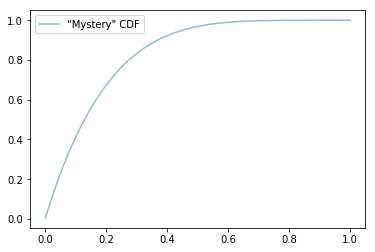

In [162]:
from scipy import stats
x_values = np.arange(1, 1000, 1).astype(np.float32)/1000
cdf_values = stats.beta.cdf(x_values, 1, 5)

plt.plot(x_values, cdf_values, alpha = 0.5, label = '"Mystery" CDF')
plt.legend()
plt.show()

Let's try to interpret this arbitrary CDF. Recall that the CDF $F$ for a random variable $X$ is simply the probability that $X$ will be less than or equal to $x$: $F(x) = P(X \le x)$. Here, $F(0)$ is $0$, meaning that our random variable $X$ wil never be less than $0$. However, the slope of the CDF is pretty high: the CDF increases very quickly, until at $x = 0.1$, $F(0.1) \approx 0.5$. Like we discussed earlier, this means that $X$ is very likely to appear in the range between $0$ and $0.1$. On the other hand, the slope of the CDF is very small (almost $0$) between $0.6$ and $0.9$, implying that $X$ will almost never appear in that range.

We can take this idea to its limit (get it!) by taking the derivative of the CDF, which corresponds to limit of the probability that $X$ will fall into a bin around some value as the size of the bin gets smaller and smaller. This derivative is the PDF, and just as we suspected, it is very high while $x$ is close to $0$, and drops off as $x$ increases.

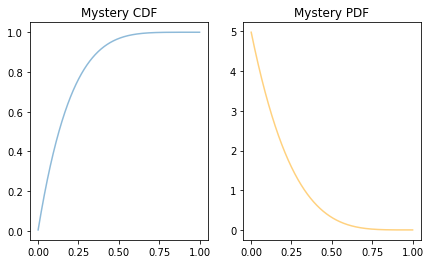

In [163]:
pdf_values = stats.beta.pdf(x_values, 1, 5)

fig, (ax2, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(7, 4))
ax1.plot(x_values, pdf_values, color = 'orange', alpha = 0.5)
ax2.plot(x_values, cdf_values, alpha = 0.5)
ax1.set_title("Mystery PDF")
ax2.set_title("Mystery CDF")
plt.show()

At this point, the difference between a "Probability Mass Function" and a "Probability Density Function" might be a bit clearer, especially if you've ever done any physics. For a probability *mass* function of a *discrete* random variable, there is actual *mass*, or a finite probability, associated with many points.

On the other hand, for a continuous random variable, there's no finite probability associated with any point, so instead we associate each point with a *density*.


### <a name = "distributions"></a> Fundamental Distributions

#### Binomial

#### <a name = "poisson"></a> Poisson and Exponential

#### Gaussian/Normal 

## Modeling 

### Generative Models

A **model** is a set of assumptions (and, usually, equations) which frame the way the world works. For example, you might model a series of dice rolls in a board game by assuming they are independent from each other - in other words, the outcome of the first roll does not affect the outcome of the second roll.

However, we'll usually be interested in **generative models.** A generative model with respect to some observed data is a model which is capable of *fully simulating* the observed data. For example, if you observed a bunch of dice rolls in a row, as follows:

$$ 1, \, 3, \, 4, \, 6, \, 2, \, 5, \, 5, \, 3, \, 1, \, 6$$

just knowing that each roll is independent of the others is *not* enough to simulate the data. To do that, you'd need to also to specify the *probability distribution* of the value of each roll - in other words, the probability that any roll will land as a $1$ or a $2$ or a $3$, etc. 

We like generative models for at least two reasons! First, they let us do fun (and useful) math - for example, we can estimate the probability that the observed data occurs under a model. As we'll see, calculating the likelihood of observed data is extremely important in techniques like Maximum Likelihood Estimation and more. Second, generative models can also *do* cool things: for example, a generative model for natural language can [write a chapter of Harry Potter](https://medium.com/deep-writing/harry-potter-written-by-artificial-intelligence-8a9431803da6) or even create [fake pictures of real celebrities](https://www.youtube.com/watch?v=VrgYtFhVGmg). 

### The Data Generating Process

The **Data Generating Process** (DGP) is the "true" generative model. To be more specific, in most problems we assume there is some underlying joint probability distribution which governs the data we observe, and the DGP is that underlying distribution. The DGP is a bit like the government in this sense - we can never know exactly what it's doing internally, but we can use external data to get a rough sense of what's going on.

In the example in the next section, which will tie together all of this material, we have a "God's eye view" and can see the DGP in all its glory, but only because I literally made up the data. In reality, you will never know the DGP - the point of ML is broadly to create models which approximate it. We call a model *correctly specified* if it has the same underlying structure as the DGP.

### Estimators, Parametric, and Nonparametric Models

Like people, models tend to come in families. For example, the normal distribution is not a single distribution - it's a family of extremely similar distributions, each of which depends on two values: a *mean* and *variance.* We generally call values which help index families of models *parameters*. 

Unfortunately, we don't usually know the values of parameters we're interested in. As a result, we have to create *estimates* for parameter values. We do this using *estimators*, which are just functions of random data which we can use to guess the parameter of interest. Usually, we denote estimators by putting a little hat on top of some symbol, like $\hat \theta$ or $\hat \sigma$.  

To understand all of the modeling terminology we've been discussing, consider the example below.

<div class = 'notice--warning'> Warning: the term "estimator" is extremely confusing. The key point to remember is that an <strong> estimate </strong> is nonrandom, whereas an <strong> estimator </strong> is a function of
random data. Both serve as a guess for a parameter of interest. This is all made more confusing by the fact that some people refer to values they want to learn as <strong> estimands </strong>. </div>

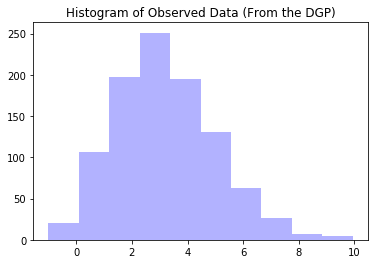

In [71]:
np.random.seed(210)

# Simulate data w random noise
num_samples = 1000
true_lambda = np.pi 
data = np.random.poisson(true_lambda, size = num_samples) 
data = data + 0.5*np.random.randn(num_samples) 
plt.hist(data, color = 'blue', alpha = 0.3)
plt.title("Histogram of Observed Data (From the DGP)")
plt.show()

Let's try fitting two models to this data. 

In the first model, we'll make a big (but correct!) assumption: that the DGP is primarily a [Poisson distribution](#poisson). However, we need to find the rate parameter for the Poisson distribution. We'll talk more about different types of estimators in the coming posts, but one commonly used estimator is simply the mean of the data. This makes intuitive sense, because the mean of a Poisson is its rate parameter. Then, if we denote our parameter as $\lambda$, our $n$ data points as $X_1, \dots, X_n$, and our estimator as $\hat \lambda$, we define

$$ \hat \lambda = \frac{1}{n} \sum_{i = 1}^n X_n$$

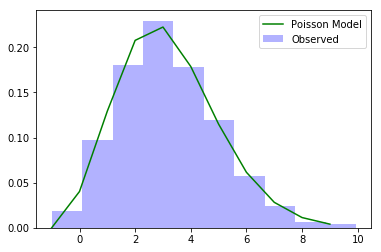

In [72]:
# Draw values from model dist
hat_lambda = data.mean()
def model_pmf(x): return stats.poisson.pmf(x, hat_lambda, loc=0)
x_values = np.arange(-1, 10, 1).astype(np.float64)
model_pmf_values = model_pmf(x_values)

# Plot
fig, ax = plt.subplots()
ax.hist(data, color = 'blue', alpha = 0.3, density = True, label = 'Observed')
ax.plot(x_values, model_pmf_values, color = 'green', alpha = 1, label = 'Poisson Model')
ax.legend()
plt.show()

In our second model, we'll make fewer assumptions about the underlying distribution of the data. (This model is also a bit more complicated). We will model the density function underlying the data by simply calculating the percent of data which falls into a small bin around the data. In this setting, our estimand is the shape of the distribution itself: we're modeling the entire distribution in one go. (This is a simple example of __kernal density estimation (kde)__, which we'll talk more about later). 

To get a little bit more formal, suppose we have observed data $X_1, \dots, X_n$ and we have selected a binsize of $h$ (usually, the more data you have observed, the smaller you make the binsize). Then, for any real number $y$, our estmimator, called $\hat f$, returns the following expression:

$$ \hat f(y) = \frac{1}{h} \sum_{i=1}^n \frac{I_{|X_i - y| < h/2}} {n} $$

This notation may be a bit confusing at first, but remember that $I_{X_i \in (a_i, b_i])} $ is just an indicator random variable which equals $1$ if the $n$th data observation $X_n$ falls within $\frac{h}{2}$ of the input $y$, and $0$ otherwise. Let's see how this model performs below, especially compared against the Poisson model:


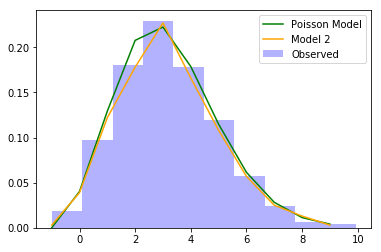

In [73]:
from sklearn.neighbors.kde import KernelDensity

# Model 2 - Rectangular KDE 
bandwidth = 1.06 * data.std() * num_samples ** (-1/5)
def f_hat(y): 
    return sum(1 for x in data if abs(x - y) < bandwidth)/len(data)

f_hat = np.vectorize(f_hat)
model2_values = f_hat(x_values)

fig, ax = plt.subplots()
ax.hist(data, color = 'blue', alpha = 0.3, density = True, label = 'Observed')
ax.plot(x_values, model_pmf_values, color = 'green', alpha = 1, label = 'Poisson Model')
ax.plot(x_values, model2_values, color = 'orange', alpha = 1, label = 'Model 2')
ax.legend()
plt.show()

Both models perform reasonably well, probably because in these kinds of examples, we have the luxury of actually knowing the DGP and can model accordingly. 

However, there is one key difference to note between the two models. In the first model, no matter how much data we observe, we only have one parameter: the rate parameter for the Poisson. On the other hand, in the second model, our binsize gets smaller and smaller the more data we observe. As a result, the number of output values we have to estimate for the function actually scales with the size of the data; so if we observed an infinite amount of data, we'd have to estimate an infinite number of values, i.e. each value $\hat f(y)$ for any $y \in \mathbb{R}$.

This difference between the models is so important it has a name. Because the first model only has a *finite* number of parameters, it is called a **parametric model.** On the other hand, as we observe more data, the second model has an unbounded number of parameters. As a result, it is called a **nonparametric model.**

### Supervised and Unsupervised Learning

One last important distinction worth reviewing is the difference between **supervised** and **unsupervised** learning algorithms. (The distinction's a bit artificial, but the terminology is so common it's worth reviewing). 

Unsupervised algorithms are designed to automatically detect patterns in data that has already been observed. For example, the following algorithm (called a Gaussian Mixture Model, or GMM) can take the following data as an input:

{% raw %}![](/assets/images/ML/unsup_init_data.png){% endraw %}

and the GMM will automatically cluster it into something like the following:

{% raw %}![](/assets/images/ML/gmm_output.png){% endraw %}

The GMM did not require any training data; it simply detected the underlying clusters in the data. 

On the other hand, supervised learning algorithms are designed to solve a different kind of problem. Imagine you have observed a variety of points in space, each associated with a specific color. We will represent the location of each point as $X_i$, and the color as $Y_i$. The goal in a supervised learning problem is to learn to predict $Y$ given $X$: in other words, if you observe the locations of a bunch of new points in space, predict the new colors of the points.

For example, a simple feedforward neural network might receive the following points as training data:
{% raw %}![](/assets/images/ML/feedforward_train.png){% endraw %}
Then, if you fed the network a series of new points like this:
{% raw %}![](/assets/images/ML/feedforward_test.png){% endraw %}
it would be (hopefully) able to predict their color.
{% raw %}![](/assets/images/ML/feedforward_predict.png){% endraw %}

Supervised learning algorithms have a habit of **overfitting** their training data, meaning that the algorithms basically memorizes the output for every training input, but is unable to generalize to new datasets. To detect and prevent overfitting, we often train upsupervised learning algorithms on a partial subset of the training data (maybe ~80%) and then test it on the last bit of training data which it has never seen before. 

# Last Notes

I'm always learning, and I'm sure I will make mistakes in the blog. If you find inaccuracies in my posts, please let me know either by [opening an issue on GitHub](https://github.com/amspector100/amspector100.github.io) (preferred) or emailing me at amspector100@gmail.com. 